In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, laplace, norm

try:
    from probml_utils import savefig, latexify
except:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-kedwq03x
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-kedwq03x
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 4.4 MB/s 
     |████████████████████████████████| 72 kB 601 kB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev45+g2da039c-py3-none-any.whl size=30608 sha256=71d5c8c23b8b8a61031bb2df86d7647f0d782c8c6e7f4b7c584dfdb90820080a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wc_b0abp/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
Successfully built probml-utils


In [2]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


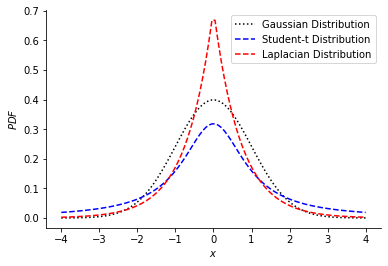

In [3]:
def studentt(range, number, save_name, fig=None, ax=None):
  x = jnp.linspace(-range, range, number)
  n = norm.pdf(x, loc=0, scale=1)
  l = laplace.pdf(x, loc=0, scale=1 / (2 ** 0.5))
  t1 = t.pdf(x, df=1, loc=0, scale=1)

  if fig is None:
        fig, ax = plt.subplots()

  ax.plot(x, n, 'k:')
  ax.plot(x, t1, 'b--')
  ax.plot(x, l, 'r--')
  ax.set_xlabel("$x$")
  ax.set_ylabel("$PDF$")
  ax.legend(('Gaussian Distribution', 'Student-t Distribution', 'Laplacian Distribution'))

  sns.despine()
  if len(save_name) > 0:
      savefig(save_name)
  return fig, ax

_, _ = studentt(4, 100, "uniform_histogram_latexified")


In [4]:
from ipywidgets import interact
@interact(range=(1, 10), number=(100, 1000))
def interactive_studentt(range, number):
  fig, ax = studentt(range, number, "")

interactive(children=(IntSlider(value=5, description='range', max=10, min=1), IntSlider(value=550, description…

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


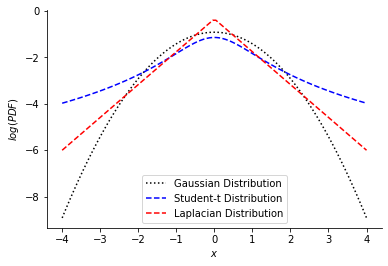

In [6]:
def studenttlog(range, number, save_name, fig=None, ax=None):
  x = jnp.linspace(-range, range, number)
  n = norm.pdf(x, loc=0, scale=1)
  l = laplace.pdf(x, loc=0, scale=1 / (2 ** 0.5))
  t1 = t.pdf(x, df=1, loc=0, scale=1)

  if fig is None:
        fig, ax = plt.subplots()

  ax.plot(x, jnp.log(n), 'k:')
  ax.plot(x, jnp.log(t1), 'b--')
  ax.plot(x, jnp.log(l), 'r--')
  ax.set_xlabel("$x$")
  ax.set_ylabel("$log(PDF)$")
  ax.legend(('Gaussian Distribution', 'Student-t Distribution', 'Laplacian Distribution'))

  sns.despine()
  if len(save_name) > 0:
      savefig(save_name)
  return fig, ax

_, _ = studenttlog(4, 100, "uniform_histogram_latexified")


In [7]:
from ipywidgets import interact
@interact(range=(1, 10), number=(100, 1000))
def interactive_studentt(range, number):
  fig, ax = studenttlog(range, number, "")

interactive(children=(IntSlider(value=5, description='range', max=10, min=1), IntSlider(value=550, description…